In [ ]:
!wget https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
import scipy.io
!mv mnist.mat?raw=true mnist.mat
mat = scipy.io.loadmat('mnist.mat')

--2021-11-10 18:16:40--  https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat [following]
--2021-11-10 18:16:40--  https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat [following]
--2021-11-10 18:16:40--  https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


X = mat['trainX'] #### train on this 
y = np.squeeze(mat['trainY'])

testX = mat['testX'] ### only evaluate on this 
testY = np.squeeze(mat['testY'])


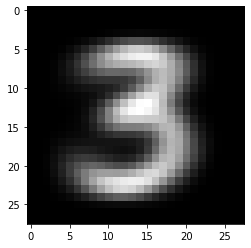

In [ ]:
threes = X[np.where(y==3)]
xbar = np.mean(threes, axis = 0)

plt.imshow(np.reshape(xbar, (28, 28)), cmap='gray')

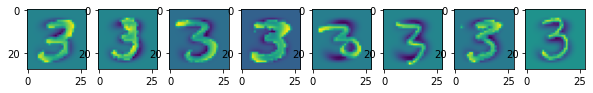

In [ ]:
xzeromean = threes - xbar


fig, ax = plt.subplots(1, 8, figsize=(10, 10))
for i in range(8):
  ax[i].imshow(np.reshape(xzeromean[i], (28, 28)))




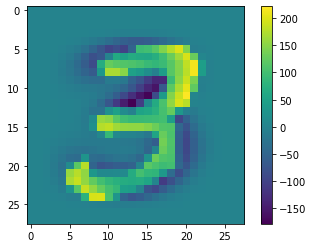

In [ ]:
plt.imshow(np.reshape(xzeromean[0], (28, 28)))
plt.colorbar()

In [ ]:
covmat = xzeromean.T.dot(xzeromean) / (xzeromean.shape[0] - 1)

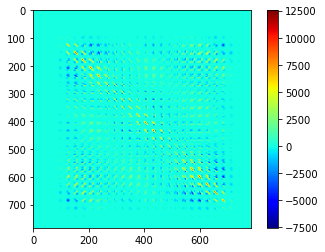

In [ ]:
np.shape(covmat)

plt.imshow(covmat, cmap="jet")
plt.colorbar()

In [ ]:

eigenvals, eigenvecs = np.linalg.eig(covmat)

eigpairs = [ (eigenvals[i], eigenvecs[: , i] ) for i in range( len(eigenvals) ) ]
eigpairs.sort(key=lambda x : x[0] , reverse = True )


In [ ]:
subspace = np.array([eigpairs[i][1] for i in range(28*28)]).T



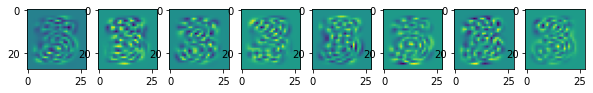

In [ ]:

fig, ax = plt.subplots(1, 8, figsize=(10, 10))
for i in range(8):
  ax[i].imshow(np.reshape(np.real(subspace[:, 100+i]), (28, 28)))



<Figure size 432x288 with 0 Axes>

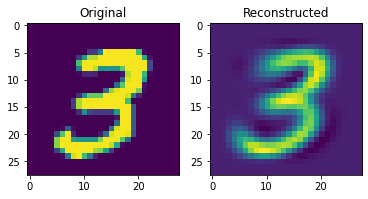

<Figure size 432x288 with 0 Axes>

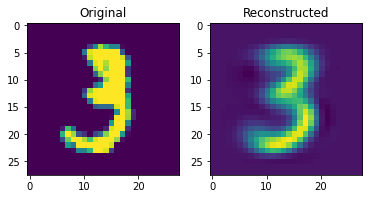

<Figure size 432x288 with 0 Axes>

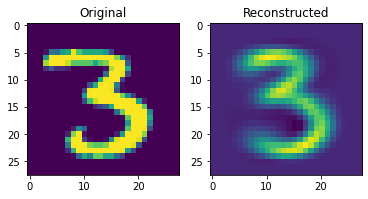

<Figure size 432x288 with 0 Axes>

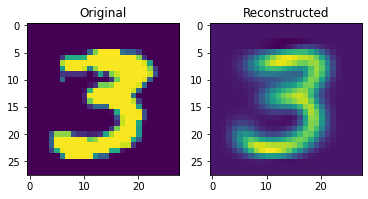

<Figure size 432x288 with 0 Axes>

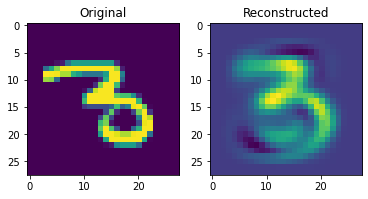

<Figure size 432x288 with 0 Axes>

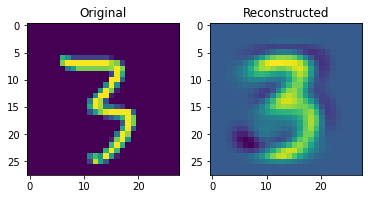

<Figure size 432x288 with 0 Axes>

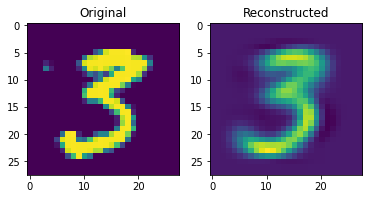

<Figure size 432x288 with 0 Axes>

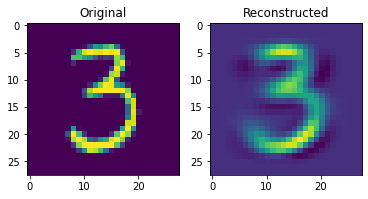

<Figure size 432x288 with 0 Axes>

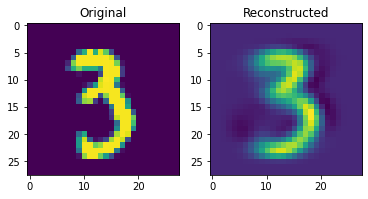

<Figure size 432x288 with 0 Axes>

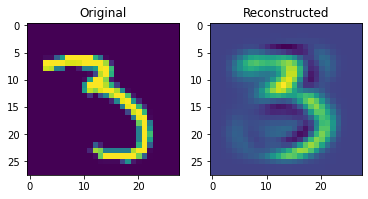

In [ ]:
# project a point from 28*28 dimensions to 1 dimension

components = 10
for digit in range(10):
  Xpca = np.dot(xzeromean[digit, :] , subspace[:, :components] )
  Xpca

  Xrecon = np.real(np.dot(subspace[:, :components], Xpca) + xbar)

  plt.figure()
  fig, ax = plt.subplots(1, 2)
  ax[0].imshow(np.reshape(xzeromean[digit, :]+xbar, (28, 28)))
  ax[0].set_title("Original")

  ax[1].imshow(np.reshape(Xrecon, (28, 28)))
  ax[1].set_title("Reconstructed")

#print(Xpca)


In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from numpy.random import RandomState
rng = RandomState(0)

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


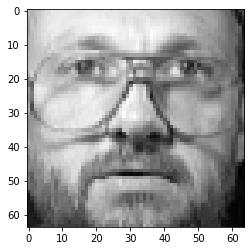

In [ ]:
plt.imshow(np.reshape(faces[0, :], (64, 64)), cmap="gray")

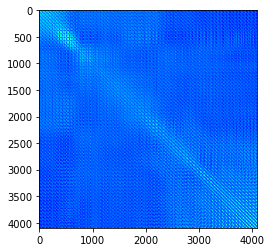

In [ ]:
covmat = faces_centered.T.dot(faces_centered) / (faces_centered.shape[0] - 1)

plt.imshow(covmat, cmap="jet")

In [ ]:
eigenvals, eigenvecs = np.linalg.eig(covmat)
eigpairs = [ (eigenvals[i], eigenvecs[: , i] ) for i in range( len(eigenvals) ) ]
eigpairs.sort(key=lambda x : x[0] , reverse = True )


KeyboardInterrupt: ignored

In [ ]:
subspace = np.array([eigpairs[i][1] for i in range(64*64)]).T

In [ ]:
fig, ax = plt.subplots(1, 8, figsize=(10, 10))
plt.figure(figsize=(20, 10))
for i in range(8):
  ax[i].imshow(np.reshape(np.real(subspace[:, i]), (64, 64)), cmap="gray")

In [ ]:
# project a point from 28*28 dimensions to 1 dimension
xbar = faces.mean(axis=0)
components = 3
projections = []
for digit in range(400):
  Xpca = np.dot(faces_centered[digit, :] , subspace[:, :components] )
  projections.append(Xpca)
  Xrecon = np.real(np.dot(subspace[:, :components], Xpca) + xbar)
  #plt.figure()
  #fig, ax = plt.subplots(1, 2)
  #ax[0].imshow(np.reshape(faces_centered[digit, :]+xbar, (64, 64)), cmap="gray")
  #ax[0].set_title("Original")
  #ax[1].imshow(np.reshape(Xrecon, (64, 64)), cmap="gray")
  #ax[1].set_title("Reconstructed")

#print(Xpca)


In [ ]:
projections = np.array(projections)

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(projections[:, 0], projections[:, 1])



In [ ]:
# generate random faces
components = 20
for i in range(10):
  Xpca = np.random.randn(components) * 2
  Xrecon = np.real(np.dot(subspace[:, :components], Xpca) + xbar)
  plt.figure()
  plt.imshow(np.reshape(Xrecon, (64, 64)), cmap="gray")